In [54]:
# SALES FORECASTING -RETAIL TRANSACTION DATA 

In [55]:
# importing necessary libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import random

In [56]:
# dataset path

path=r"C:\Users\santh\OneDrive\Documents\retailtransactions.csv"

In [57]:
# converting csv file to dataframe

df=pd.read_csv(path)

In [58]:
# checking for missing values
# calculating netprice,taxamount and shipping cost - adding extra parameters for linear regression model

df['Discount']=df['Discount'].fillna(0)
df['TransactionDate']=pd.to_datetime(df['TransactionDate'])
df['Net_price']=df['Price']*(1-df['Discount']/100)
df['TaxAmount'] = [random.randint(10, 30) for _ in range(len(df))]
df['ShippingCost'] = [random.randint(10, 25) for _ in range(len(df))]

In [59]:
# calculating total sale based on above parameters

df['Totalsale']=(df['Net_price']+df['TaxAmount'])*df['Quantity']+df['ShippingCost']

In [60]:
df

,TransactionID,TransactionDate,StoreID,CustomerID,ProductID,ProductCategory,Quantity,Price,PaymentType,Discount,Net_price,TaxAmount,ShippingCost,Totalsale
0,T001,2024-01-01,102,1646,545,Electronics,1,150,Credit,15.0,127.50,27,25,179.50
1,T002,2024-01-02,103,1226,542,Toys,2,317,Debit,10.0,285.30,18,13,619.60
2,T003,2024-01-03,102,1515,593,Electronics,5,165,Debit,0.0,165.00,24,12,957.00
3,T004,2024-01-04,103,1793,560,Furniture,6,496,Debit,10.0,446.40,22,10,2820.40
4,T005,2024-01-05,105,1864,523,Grocery,10,166,Debit,0.0,166.00,16,20,1840.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,T096,2024-04-05,101,1918,559,Apparel,2,439,Cash,10.0,395.10,15,18,838.20
96,T097,2024-04-06,104,1190,579,Electronics,4,52,Debit,0.0,52.00,26,16,328.00
97,T098,2024-04-07,102,1932,504,Apparel,7,151,Credit,10.0,135.90,18,23,1100.30
98,T099,2024-04-08,103,1285,587,Apparel,5,479,Credit,10.0,431.10,29,19,2319.50


In [61]:
#calculating monthly sales data for predicting next month sales by the method of moving averages

firstmonthsales=df[df['TransactionDate']<'2024-02-01']['Totalsale'].sum()
secondmonthsales=df[(df['TransactionDate']>'2024-02-01')&(df['TransactionDate']<'2024-03-01')]['Totalsale'].sum()
thirdmonthsales=df[(df['TransactionDate']>'2024-03-01')&(df['TransactionDate']<'2024-04-01')]['Totalsale'].sum()
fourthmonthsales=df[df['TransactionDate']>'2024-04-01']['Totalsale'].sum()
firstmonthsales

np.float64(45216.2)

In [62]:
secondmonthsales

np.float64(59215.15)

In [63]:
thirdmonthsales

np.float64(38945.8)

In [64]:
fourthmonthsales

np.float64(9928.849999999999)

In [65]:
# necessary libraries for linear regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [66]:
# dividing the dataset into feature and target variables

x=df[['Quantity','Price','Discount','TaxAmount','ShippingCost']]
y=df['Totalsale']

In [67]:
# splitting the dataset into training and testing data for model builiding 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [68]:
# necessary libraries for model evaluation

from sklearn.metrics import mean_absolute_error,mean_squared_error
y_pred=model.predict(x_test)
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE= np.sqrt(MSE) # root mean square error
print(f'mean absolute error :{MAE}')
print(f'mean squared error :{MSE}')
print(f'root mean square error :{RMSE}')

mean absolute error :313.1387827682557
mean squared error :167155.5012704366
root mean square error :408.84654978419053


In [69]:
#taking user inputs for predicting the sales for new data points 
quantity_input=int(input('enter the quantity : '))
price_input=int(input('enter the price : '))
discount_input=float(input('enter the discount : '))
taxamount_input=int(input('enter the taxamount : '))
shippingcost_input=int(input('enter the shippingcost :'))

In [70]:
newprediction=model.predict([[quantity_input,price_input,discount_input,taxamount_input,shippingcost_input]])

C:\Users\santh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [71]:
print(f'the predicted sales is : {newprediction[0]}')

the predicted sales is : 3033.8917952175925


In [72]:
## otherwise predict with monthwise sales by moving averages method
sales=[firstmonthsales,secondmonthsales,thirdmonthsales,fourthmonthsales]
nextmonthsales=np.average(sales)
print(f'the predicted next month sales is : {nextmonthsales}')

the predicted next month sales is : 38326.50000000001


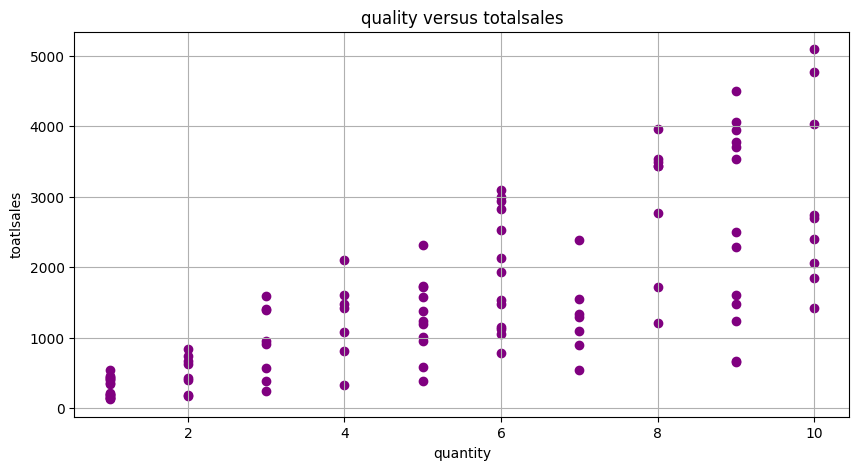

In [77]:
# visualizing the sales data based on feature and target variables 

plt.figure(figsize=(10,5))
plt.scatter(df['Quantity'],df['Totalsale'],color='purple')
plt.xlabel('quantity')
plt.ylabel('toatlsales')
plt.title('quality versus totalsales')
plt.grid(True)
plt.show()

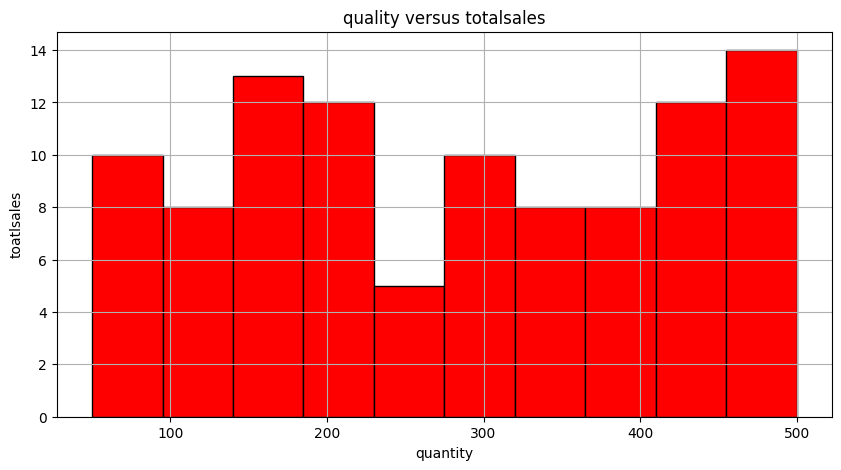

In [76]:
plt.figure(figsize=(10,5))
plt.hist(df['Price'],bins=10,color='red',edgecolor='black')
plt.xlabel('quantity')
plt.ylabel('toatlsales')
plt.title('quality versus totalsales')
plt.grid(True)
plt.show()